In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

from skimage import io
from scipy.interpolate import BSpline
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import sympy
from sympy import *

In [9]:
import musicalrobot
from musicalrobot import edge_detection as ed

In [10]:
frames = ed.input_file('../musicalrobot/data/PPA_Melting_6_14_19.tiff')

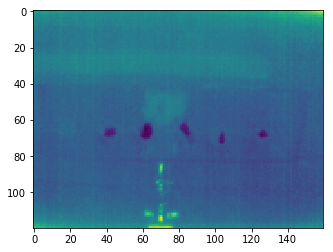

In [11]:
plt.imshow(frames[0])

### Crop the input file if required to remove the noise and increase the accuracy of edge detection

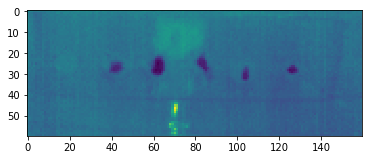

In [12]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[40:100])
plt.imshow(crop_frame[0])

In [14]:
flip_frames = ed.flip_frame(crop_frame)

In [22]:
labeled_samples = ed.edge_detection(flip_frames)

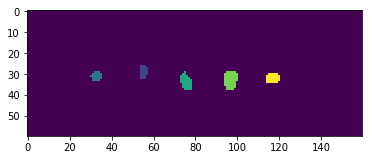

In [23]:
plt.imshow(labeled_samples)

In [24]:
regprops = ed.regprop(labeled_samples, flip_frames, 5, 1, 5)

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

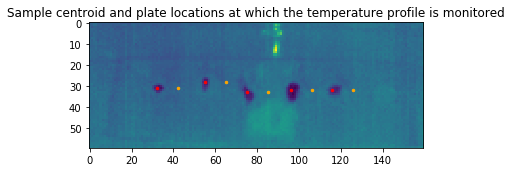

In [25]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(flip_frames[0])
plt.scatter(regprops[0]['Plate_coord'],regprops[0]['Row'],c='orange',s=6)
plt.scatter(regprops[0]['Column'],regprops[0]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [34]:
s_temp,p_temp = ed.sample_temp(regprops,flip_frames)

In [59]:
frame_len = np.linspace(1,len(p_temp[0]),len(p_temp[0]))

In [101]:
temp = s_temp[0]

In [102]:
bspl = BSpline(frame_len,temp,k=3)

In [103]:
gradient_array = np.column_stack((frame_len,bspl(frame_len)))

In [104]:
gradient = np.gradient(gradient_array,axis=0)
derivative = gradient[:,1]/gradient[:,0]

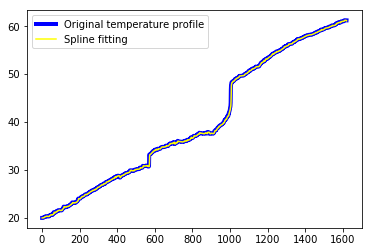

In [105]:
plt.plot(frame_len,s_temp[0],label='Original temperature profile',linewidth=4,color='blue')
plt.plot(frame_len,bspl(frame_len),label='Spline fitting',color='yellow')
plt.legend()

Text(0, 0.5, 'Derivative of sample temperature with respect to frames')

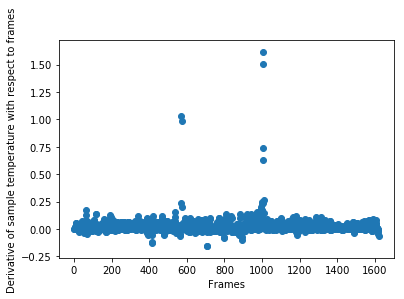

In [106]:
plt.scatter(frame_len,derivative)
plt.xlabel('Frames')
plt.ylabel('Derivative of sample temperature with respect to frames')

Text(0, 0.5, 'Temperature of the sample($^\\circ$C)')

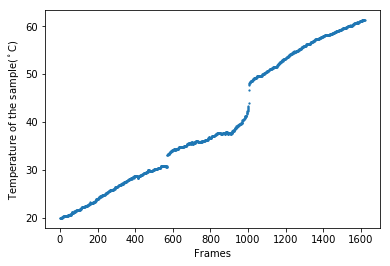

In [81]:
plt.scatter(frame_len,s_temp[0],s=1.5)
plt.xlabel('Frames')
plt.ylabel('Temperature of the sample($^\circ$C)')

Text(0, 0.5, 'Temperature of the plate($^\\circ$C)')

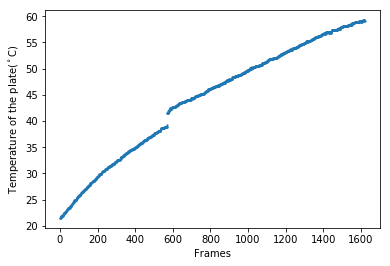

In [82]:
plt.scatter(frame_len,p_temp[0],s=1.5)
plt.xlabel('Frames')
plt.ylabel('Temperature of the plate($^\circ$C)')

In [15]:
# # Plotting the temperature profile of a sample against the temperature profile
# # of the plate at a location next to the sample.
# plt.scatter(p_temp[4],s_temp[4],s=2)
# plt.ylabel('Temperature of the sample($^\circ$C)')
# plt.xlabel('Temperature of the well plate($^\circ$C)')
# plt.title('Temperature of the sample against the temperature of the plate')

In [15]:
# def inflection_point(s_temp,p_temp):
#     s_infl = []
#     p_infl = []
#     s_peaks = []
#     p_peaks = []
#     inf_peak = [] ; inf_temp = []
#     for temp in s_temp:
#         frames = np.linspace(1,len(temp),len(temp))
#         bspl = BSpline(frames,temp,k=3)
#         gradient_array = np.column_stack((frames,bspl(frames)))
#         gradient = np.gradient(gradient_array,axis=0)
#         derivative = gradient[:,1]/gradient[:,0]
#         peaks, properties = find_peaks(derivative,height=0.1)
#         max_height1 = np.max(properties['peak_heights'])
#         # To find the second highest peak
#         a = list(properties['peak_heights'])
#         a.remove(max_height1)
#         max_height2 = np.max(a)
#         inf_index1 = list(properties['peak_heights']).index(max_height1)
#         inf_index2 = list(properties['peak_heights']).index(max_height2)
#         s_peaks.append([peaks[inf_index1],peaks[inf_index2]])
#         s_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
#     for temp in p_temp:
#         frames = np.linspace(1,len(temp),len(temp))
#         bspl = BSpline(frames,temp,k=3)
#         gradient_array = np.column_stack((frames,bspl(frames)))
#         gradient = np.gradient(gradient_array,axis=0)
#         derivative = gradient[:,1]/gradient[:,0]
#         peaks, properties = find_peaks(derivative,height=0.1)
#         max_height1 = np.max(properties['peak_heights'])
#         # To find the second highest peak
#         a = list(properties['peak_heights'])
#         a.remove(max_height1)
#         max_height2 = np.max(a)
#         inf_index1 = list(properties['peak_heights']).index(max_height1)
#         inf_index2 = list(properties['peak_heights']).index(max_height2)
#         p_peaks.append([peaks[inf_index1],peaks[inf_index2]])
#         p_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
#     for i,peaks in enumerate(s_peaks):
#         for peak in peaks:
#             if peak - p_peaks[i][0] >= 3:
#                 inf_peak.append(peak)
#             else:
#                 pass
#     for i,temp in enumerate(s_temp):
#         inf_temp.append(temp[inf_peak[i]])
#     return inf_temp, s_peaks, p_peaks